# Ford Motor Company (F) Dataset
This project will entail all the models that are found in a Time Series as trained by Prof Yoon Yoon. 

Method
Before inclusivity of Machine learning, there are a number of steps that we will need to implement when it comes to a data science process of analysing a dataset
 * Downloading the historical dataset of Ford Motor Company from Yahoo Finance 
 * Exploratory Data Analysis 
 * Setup Historical dataset for prediction
 * Introduction of models and Tests

        1. AR, MA, ARMA & SARIMA Modeling 
        2. Anomaly Detection 
        3. Augmented Dickey_Fuller Test
        
* Test and select the best Machine learning to use.
* Improve accuracy of model to be used


In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()



<ipython-input-2-716cb7d93428>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
df = yf.Ticker('F') 

# Exploratory Data Analysis

In [4]:
df.actions

,Dividends,Stock Splits
Date,,
1972-07-25,0.021897,0.0
1972-10-25,0.021897,0.0
1973-01-23,0.022708,0.0
1973-04-24,0.022708,0.0
1973-07-24,0.032440,0.0
...,...,...
2019-04-23,0.150000,0.0
2019-07-22,0.150000,0.0
2019-10-21,0.150000,0.0


In [5]:
df.dividends

Date
1972-07-25    0.021897
1972-10-25    0.021897
1973-01-23    0.022708
1973-04-24    0.022708
1973-07-24    0.032440
                ...   
2019-04-23    0.150000
2019-07-22    0.150000
2019-10-21    0.150000
2020-01-29    0.150000
2021-11-18    0.100000
Name: Dividends, Length: 166, dtype: float64

In [6]:
df.splits

Date
1977-06-27    1.250000
1983-12-02    1.500000
1986-06-03    1.500000
1988-01-13    2.000000
1994-07-06    2.000000
1998-04-08    1.505797
2000-06-29    1.040908
2000-08-03    1.748175
Name: Stock Splits, dtype: float64

In [7]:
df.financials
df.quarterly_financials

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1885000000.0,735000000.0,3942000000.0,-3810000000.0
Minority Interest,111000000.0,120000000.0,146000000.0,121000000.0
Net Income,1832000000.0,561000000.0,3262000000.0,-2788000000.0
Selling General Administrative,2947000000.0,1856000000.0,2231000000.0,3304000000.0
Gross Profit,4269000000.0,2864000000.0,5357000000.0,1035000000.0
Ebit,1322000000.0,1008000000.0,3126000000.0,-2269000000.0
Operating Income,1322000000.0,1008000000.0,3126000000.0,-2269000000.0
Other Operating Expenses,None,None,None,None


In [8]:
df.major_holders

,0,1
0,0.28%,% of Shares Held by All Insider
1,54.24%,% of Shares Held by Institutions
2,54.39%,% of Float Held by Institutions
3,1756,Number of Institutions Holding Shares


In [9]:
df.balance_sheet

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Capital Surplus,2.229000e+10,2.216500e+10,2.200600e+10,2.184300e+10
Total Liab,2.364500e+11,2.253070e+11,2.204740e+11,2.227920e+11
Total Stockholder Equity,3.069000e+10,3.318500e+10,3.593200e+10,3.557800e+10
Minority Interest,1.210000e+08,4.500000e+07,1.340000e+08,1.260000e+08
Other Current Liab,2.161900e+10,1.959900e+10,1.727000e+10,1.640200e+10
Total Assets,2.672610e+11,2.585370e+11,2.565400e+11,2.584960e+11
Common Stock,4.100000e+07,4.100000e+07,4.100000e+07,4.100000e+07
Other Current Assets,1.998000e+09,5.471000e+09,3.930000e+09,3.649000e+09
Retained Earnings,1.824300e+10,2.032000e+10,2.266800e+10,2.190600e+10
Other Liab,2.679300e+10,2.476700e+10,2.418500e+10,2.552600e+10


In [10]:
df.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",297988697,2021-09-29,0.0759,4219519949
1,Blackrock Inc.,266501882,2021-09-29,0.0679,3773666649
2,State Street Corporation,164032458,2021-09-29,0.0418,2322699605
3,Newport Trust Co,160486909,2021-09-29,0.0409,2272494631
4,"Geode Capital Management, LLC",65225928,2021-09-29,0.0166,923599140
5,Bank of America Corporation,51028567,2021-09-29,0.0130,722564508
6,Northern Trust Corporation,41201768,2021-09-29,0.0105,583417034
7,Norges Bank Investment Management,39459231,2020-12-30,0.0101,346846640
8,"Shaw D.E. & Co., Inc.",29830501,2021-09-29,0.0076,422399894
9,Bank Of New York Mellon Corporation,29424662,2021-09-29,0.0075,416653213


In [11]:
df.cashflow
df.quarterly_cashflow

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Investments,-1.064000e+09,6.154000e+09,1.060000e+08,-4.230000e+09
Change To Liabilities,5.927000e+09,-6.631000e+09,1.930000e+08,2.951000e+09
Total Cashflows From Investing Activities,-1.170000e+09,6.669000e+09,-4.910000e+08,-5.745000e+09
Net Borrowings,-1.149000e+09,-6.417000e+09,-7.688000e+09,2.226000e+09
Total Cash From Financing Activities,-1.222000e+09,-6.405000e+09,-7.793000e+09,2.284000e+09
Change To Operating Activities,-1.957000e+09,7.858000e+09,2.607000e+09,1.098000e+09
Net Income,1.832000e+09,5.610000e+08,3.262000e+09,-2.788000e+09
Change In Cash,4.462000e+09,1.112000e+09,-3.885000e+09,1.463000e+09
Effect Of Exchange Rate,-1.540000e+08,9.200000e+07,-9.300000e+07,3.850000e+08
Total Cash From Operating Activities,7.008000e+09,7.560000e+08,4.492000e+09,4.539000e+09


In [12]:
df.earnings
df.quarterly_earnings

,Revenue,Earnings
Quarter,,
4Q2020,35952000000,-2788000000
1Q2021,36228000000,3262000000
2Q2021,26752000000,561000000
3Q2021,35683000000,1832000000


In [13]:
df.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,12.18
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [14]:
df.analysis

,Max Age,End Date,Growth,Earnings Estimate Avg,Earnings Estimate Low,Earnings Estimate High,Earnings Estimate Year Ago Eps,Earnings Estimate Number Of Analysts,Earnings Estimate Growth,Revenue Estimate Avg,...,Revenue Estimate Growth,Eps Trend Current,Eps Trend 7Days Ago,Eps Trend 30Days Ago,Eps Trend 60Days Ago,Eps Trend 90Days Ago,Eps Revisions Up Last7Days,Eps Revisions Up Last30Days,Eps Revisions Down Last30Days,Eps Revisions Down Last90Days
Period,,,,,,,,,,,,,,,,,,,,,
0Q,1,2021-12-31,0.23500,0.42,0.32,0.52,0.34,16.0,0.235,3.576730e+10,...,0.077,0.42,0.41,0.40,0.38,0.28,1.0,6.0,0.0,NaN
+1Q,1,2022-03-31,-0.42700,0.51,0.41,0.58,0.89,6.0,-0.427,3.421960e+10,...,0.020,0.51,0.50,0.49,0.47,0.46,1.0,2.0,0.0,NaN
0Y,1,2021-12-31,3.68300,1.92,1.72,2.05,0.41,18.0,3.683,1.265150e+11,...,0.092,1.92,1.91,1.86,1.90,1.58,1.0,7.0,0.0,NaN
+1Y,1,2022-12-31,0.06300,2.04,1.54,2.53,1.92,21.0,0.063,1.467220e+11,...,0.160,2.04,2.02,1.96,1.94,1.85,1.0,7.0,0.0,NaN
+5Y,1,NaT,0.79220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5Y,1,NaT,-0.00688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.calendar

,Value
Earnings Date,2022-02-03 16:05:00
Earnings Average,0.42
Earnings Low,0.32
Earnings High,0.52
Revenue Average,35767300000
Revenue Low,30828000000
Revenue High,40588000000


In [16]:
df.options

('2022-01-28',
 '2022-02-04',
 '2022-02-11',
 '2022-02-18',
 '2022-02-25',
 '2022-03-04',
 '2022-03-18',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2024-01-19')

Price Data

<AxesSubplot:title={'center':"Ford's stock price"}, xlabel='Date'>

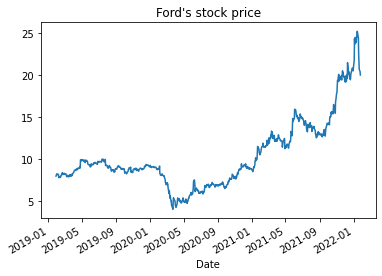

In [17]:
ticker = yf.Ticker('F')
df = ticker.history(period="3y")
df['Close'].plot(title="Ford's stock price")

In [18]:
df_price= df.Open

In [19]:
df_price = df_price.asfreq(pd.infer_freq(df_price.index))


In [20]:
df_price

Date
2019-01-28     8.073485
2019-01-29     7.990915
2019-01-30     8.083456
2019-01-31     8.046119
2019-02-01     8.186135
                ...    
2022-01-21    21.209999
2022-01-22          NaN
2022-01-23          NaN
2022-01-24    19.930000
2022-01-25    20.000000
Freq: D, Name: Open, Length: 1094, dtype: float64

Text(0.5, 1.0, 'Ford Price Data')

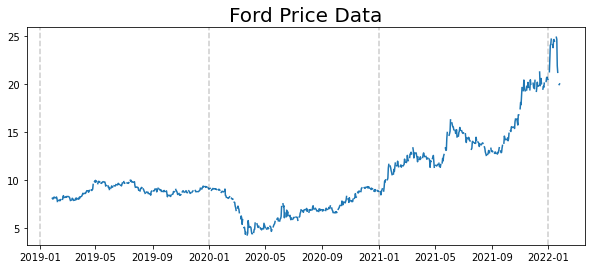

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df_price)
for year in range(df_price.index[0].year, df_price.index[-1].year+1):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.2)
plt.title("Ford Price Data", fontsize=20)

In [44]:
df_price.describe()

count    756.000000
mean      10.316373
std        4.059880
min        4.248607
25%        7.961563
50%        9.019768
75%       12.429912
max       24.870001
Name: Open, dtype: float64

(9.0, 4.0)

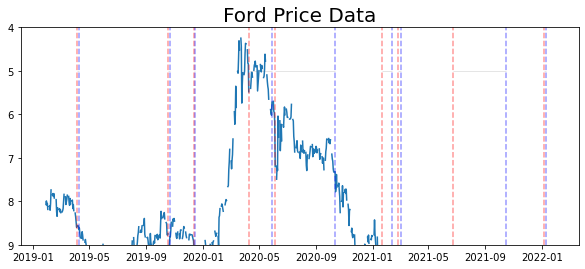

In [45]:
plt.figure(figsize=(10,4))
plt.plot(df_price)

y_lims = (int(df_price.mean()*.95), int(df_price.std()*1.05))
shaded_y_lims = int(df_price.mean()*.5), int(df_price.std()*1.5)

for idx, event in enumerate(events_list):
    color = 'red' if event[0] == 'b' else 'blue'
    plt.axvline(event[1], color=color, linestyle='--', alpha=0.4)
    if event[0] == 's':
        plt.fill_betweenx(range(*shaded_y_lims), 
                        event[1], events_list[idx-1][1], color='k', alpha=0.1)

plt.title("Ford Price Data", fontsize=20)
plt.ylim(*y_lims)

# Models & Tests

1. Moving Average

In [35]:
df = yf.Ticker("F")
# get historical market data
df = df.history(start="2020-01-01", end= "2022-01-01")

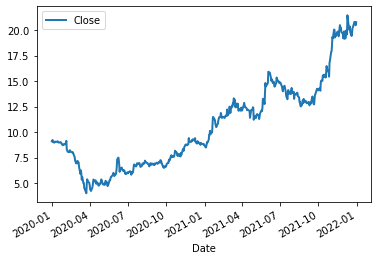

In [36]:
df[['Close']].plot(lw=2);

ACFs and PACF Plots

Visuals of Lags

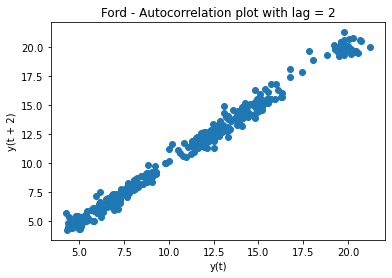

In [37]:
plt.figure()
lag_plot(df['Open'], lag=2)
plt.title('Ford - Autocorrelation plot with lag = 2')
plt.show()

In [62]:
import statsmodels.api as sm
from pylab import rcParams

In [71]:
df_price.head()

Date
2019-01-28    8.073485
2019-01-29    7.990915
2019-01-30    8.083456
2019-01-31    8.046119
2019-02-01    8.186135
Freq: D, Name: Open, dtype: float64

In [70]:
df_price.isna().any()

True

In [ ]:
df_price.drop([na])

In [51]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rolling_av,forecast
Date,,,,,,,,,
2019-12-31,9.049750,9.128018,9.049750,9.098668,32342100,0.0,0,NaN,<bound method MLEResults.predict of <statsmode...
2020-01-02,9.088884,9.216070,8.991049,9.216070,43425700,0.0,0,NaN,<bound method MLEResults.predict of <statsmode...
2020-01-03,9.108453,9.167153,8.951916,9.010617,45040800,0.0,0,NaN,<bound method MLEResults.predict of <statsmode...
2020-01-06,8.902998,8.971482,8.863864,8.961699,43372300,0.0,0,NaN,<bound method MLEResults.predict of <statsmode...
2020-01-07,9.000833,9.049750,8.922565,9.049750,44984100,0.0,0,NaN,<bound method MLEResults.predict of <statsmode...


In [52]:
from statsmodels.tsa.arima_process import ArmaProcess

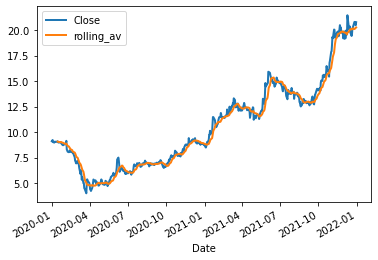

In [38]:
df['rolling_av'] = df['Close'].rolling(10).mean()
# take a look
df[['Close','rolling_av']].plot(lw=2);

In [39]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df['Close'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  506
Model:                ARIMA(0, 0, 10)   Log Likelihood                -295.949
Date:                Wed, 26 Jan 2022   AIC                            615.897
Time:                        09:59:39   BIC                            666.616
Sample:                             0   HQIC                           635.789
                                - 506                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6559      0.415     25.699      0.000       9.843      11.469
ma.L1          1.5141      0.036     41.603      0.000       1.443       1.585
ma.L2          1.9577      0.066     29.799      0.0

Predictions with Moving Average

In [55]:
df['forecast'] = results.predict 


In [41]:
df[['Close','rolling_av','forecast']].tail(10)

,Close,rolling_av,forecast
Date,,,
2021-12-17,19.770000,20.080,<bound method MLEResults.predict of <statsmode...
2021-12-20,19.420000,20.100,<bound method MLEResults.predict of <statsmode...
2021-12-21,19.610001,20.065,<bound method MLEResults.predict of <statsmode...
2021-12-22,20.139999,20.098,<bound method MLEResults.predict of <statsmode...
2021-12-23,20.250000,20.166,<bound method MLEResults.predict of <statsmode...
2021-12-27,20.799999,20.101,<bound method MLEResults.predict of <statsmode...
2021-12-28,20.760000,20.134,<bound method MLEResults.predict of <statsmode...
2021-12-29,20.559999,20.185,<bound method MLEResults.predict of <statsmode...
2021-12-30,20.469999,20.213,<bound method MLEResults.predict of <statsmode...


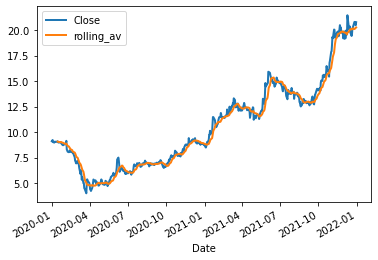

In [42]:
df[['forecast','Close','rolling_av']].plot(lw=2);

Finacial Analysis of Ford 

In [74]:
df = yf.Ticker('F') 

In [75]:
df.financials 


,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,-1116000000.0,-640000000.0,4345000000.0,8159000000.0
Minority Interest,121000000.0,45000000.0,134000000.0,126000000.0
Net Income,-1279000000.0,47000000.0,3677000000.0,7731000000.0
Selling General Administrative,8628000000.0,10218000000.0,9781000000.0,9962000000.0
Gross Profit,6123000000.0,12876000000.0,14835000000.0,16558000000.0
Ebit,-2505000000.0,2658000000.0,5054000000.0,6596000000.0
Operating Income,-2505000000.0,2658000000.0,5054000000.0,6596000000.0
Other Operating Expenses,None,None,None,None
